# Question 01.
Build a machine learning model to predict user will click the ad or not
based on his experience and estimated salary for a given dataset. \
[https://drive.google.com/open?id=1I8KsCufEa47XvzrkxhntEWSy1Su0E0NY]

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("Social_Network_Ads.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [3]:
df.head(10)   # Printing the first 10 rows of data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.rename(columns = {'Purchased': 'Clicked'}, inplace = True)

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Clicked
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df['Clicked'].value_counts()

0    257
1    143
Name: Clicked, dtype: int64

In [8]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
df.head(1)

,User ID,Gender,Age,EstimatedSalary,Clicked
0,15624510,Male,19,19000,0


In [10]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Clicked            0
dtype: int64

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Gender'])
],remainder='passthrough')

In [13]:
# dataframe = transformer.fit_transform(df)

In [14]:
# dataframe = pd.DataFrame(dataframe)

In [15]:
# dataframe.head(3)

### Exploratory Data Analysis

<AxesSubplot:>

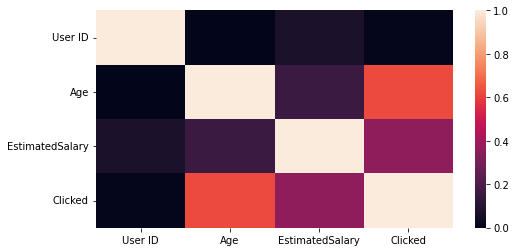

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
sn.heatmap(df.corr())
# df.corr() Gives correlation matrix
# here it shows the correlation by color mentioned on right side

In [17]:
data= df.drop('User ID',axis=1)

In [18]:
data.head()

,Gender,Age,EstimatedSalary,Clicked
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


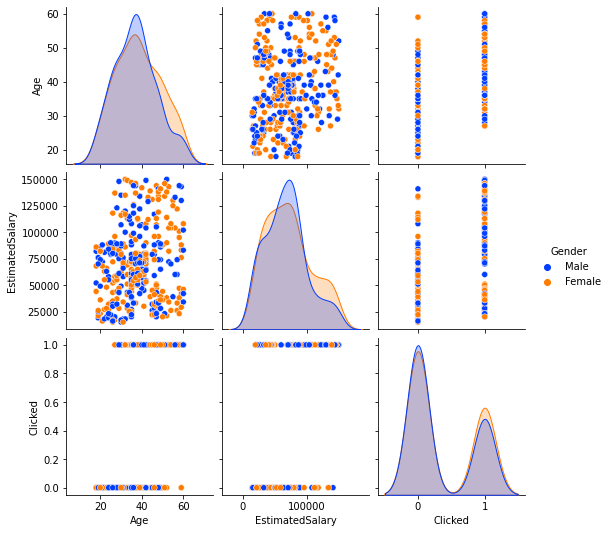

In [19]:
sn.pairplot(data,hue='Gender',palette='bright')

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

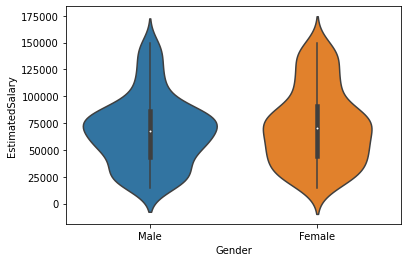

In [20]:
sn.violinplot(x=df['Gender'],y=df['EstimatedSalary'],data=data)
# shows us the distribution of data here we're checking the salary of each gender

<AxesSubplot:xlabel='Clicked', ylabel='count'>

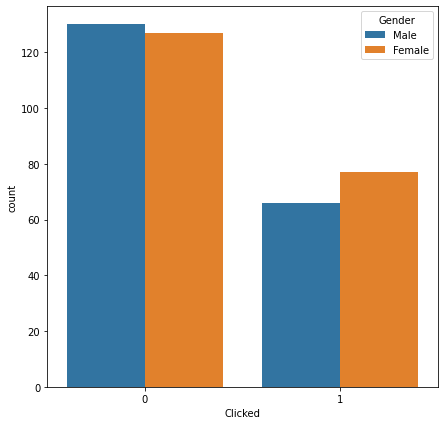

In [21]:

plt.figure(figsize=(7,7))
sn.countplot(x='Clicked',data=data,hue='Gender')
# Here we'll see the count of males who have clicked and who have not

In [22]:
data.head()

,Gender,Age,EstimatedSalary,Clicked
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [23]:
y = data['Clicked']

In [24]:
X = data.drop(['Clicked'], axis = 1)

In [25]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [26]:
le = LabelEncoder()
X['Gender'] = (pd.DataFrame(X['Gender'])).apply(le.fit_transform)

In [27]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [28]:
ss =StandardScaler()

In [29]:
for item in range(1,X.shape[1]):
    X.iloc[:,item] = ss.fit_transform((X.iloc[:,item].values).reshape(-1,1))

In [30]:
X.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


### Train/Test Split

In [31]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### Model Fitting and Training

In [32]:
from sklearn.svm import SVC

try:
    classifier=SVC(kernel="rbf", C=100, gamma=0.1)
    # regressor=SVR(kernel="linear")
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    print(classifier.score(X_test,y_test))
except Exception as e:
    print(f"Error : {e}")

0.8833333333333333


In [33]:
pred1=classifier.predict(X_train)
print(classifier.score(X_train,y_train))

0.9214285714285714
